# DIABETES PREDICTION USING LOGISTIC REG.

__The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.__

__We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.__

 <img src="https://www.genengnews.com/wp-content/uploads/2020/08/Aug28_2020_Getty_1213259073_DiabetesTestingEquipment-scaled-e1598623827835.jpg" width="400" height="200">

## IMPORTING LIBERIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## DATA INSIGHTS

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## CHECKING NULL VALUES

In [6]:
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## DATA VISUALIZATION

In [9]:
def count_plot(x):
    plt.figure(figsize=(20,10))
    sns.countplot(data[x],hue=data['Outcome'])
    plt.xticks(rotation=90)
    plt.title(x+" count plot")
    plt.show()

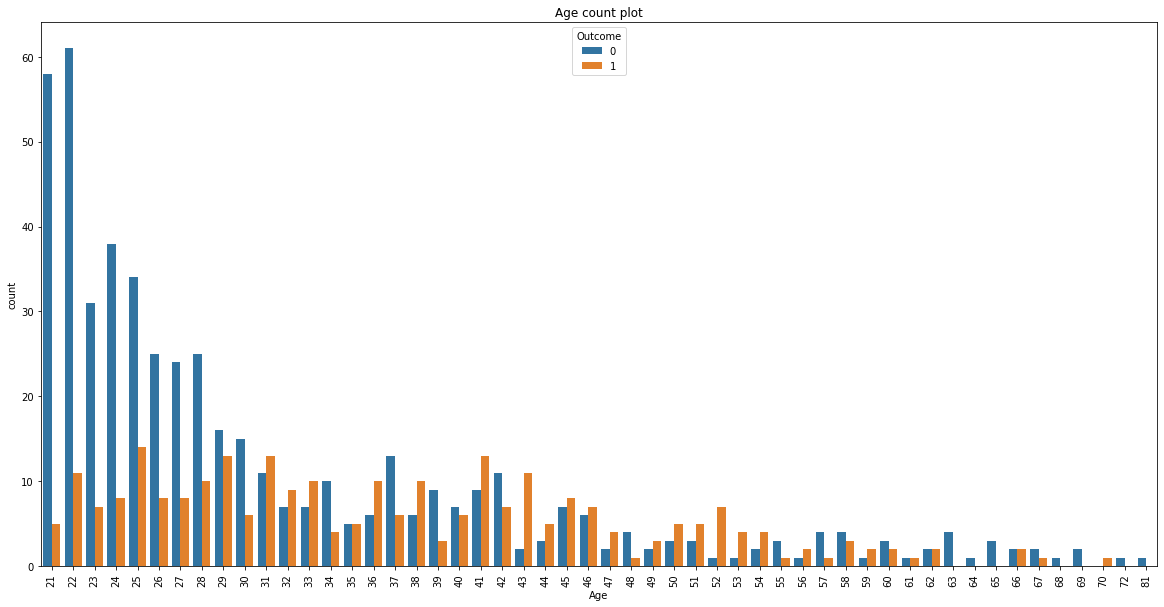

In [10]:
count_plot('Age')

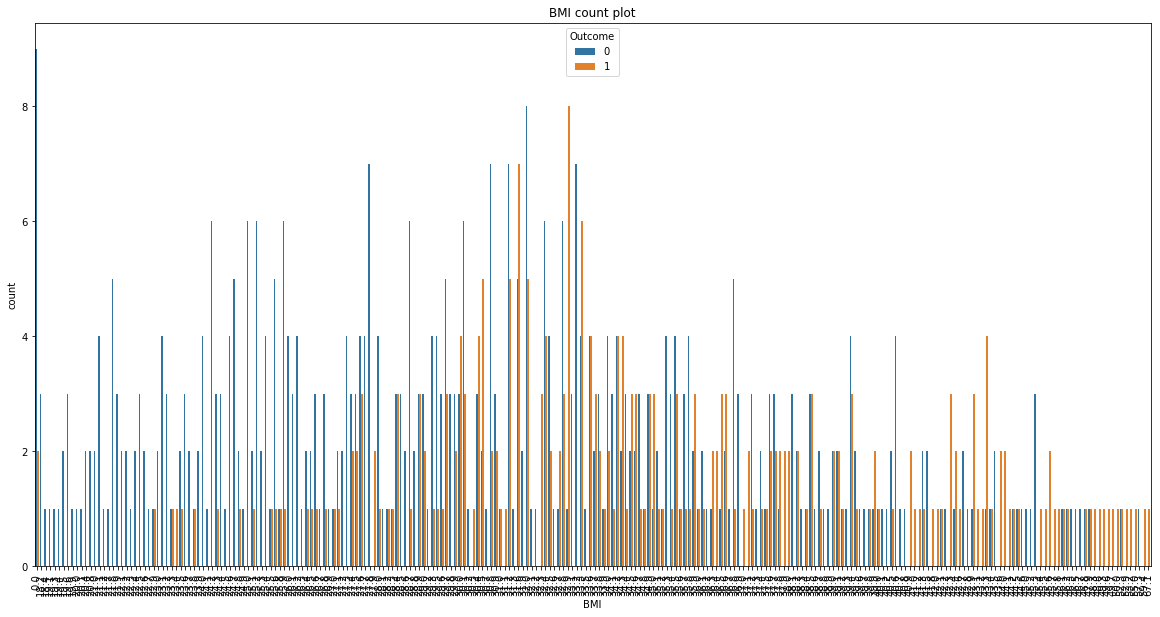

In [11]:
count_plot('BMI')

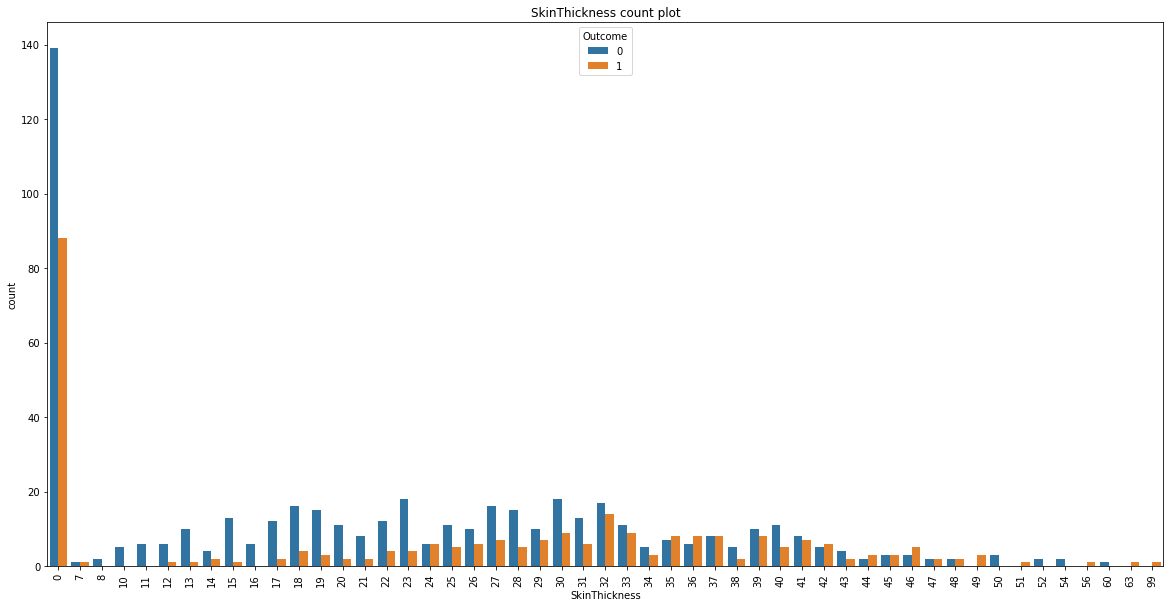

In [12]:
count_plot('SkinThickness')

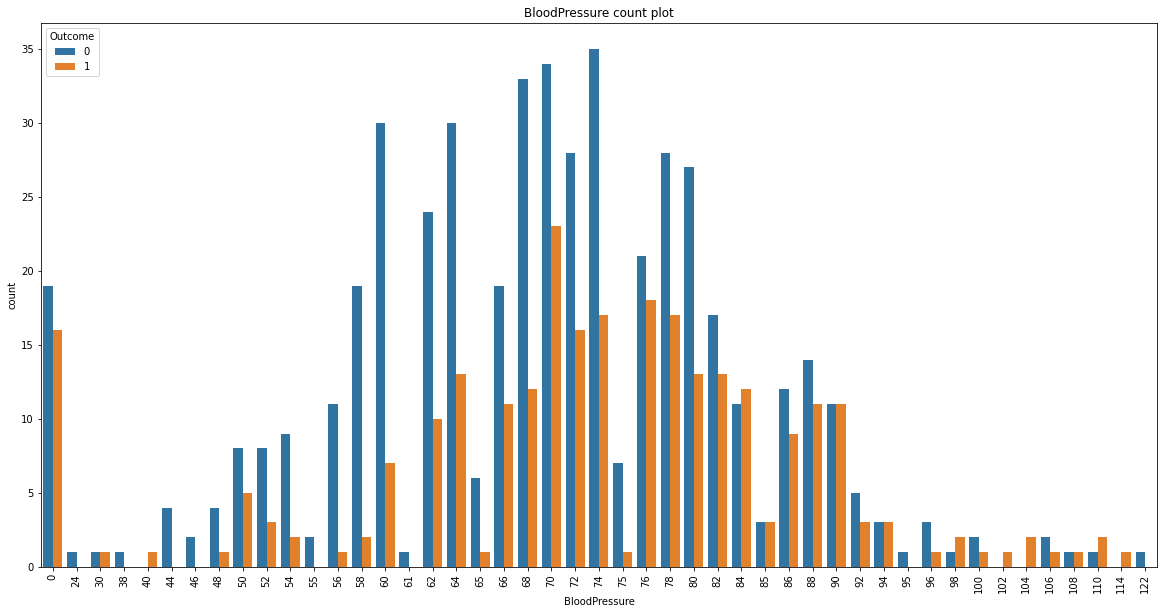

In [13]:
count_plot('BloodPressure')

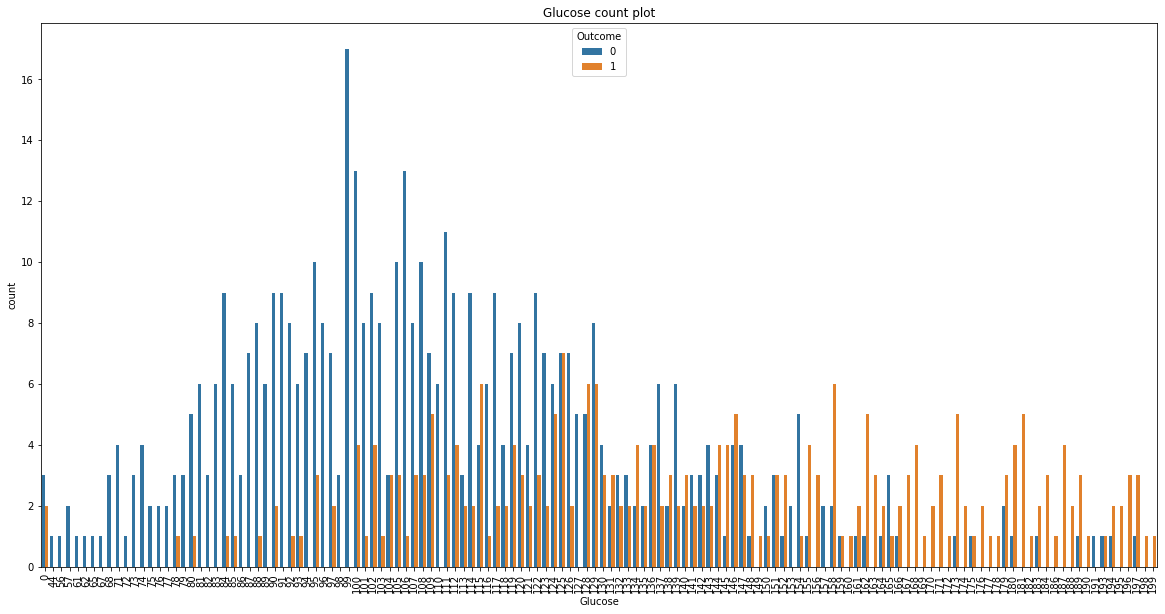

In [14]:
count_plot('Glucose')

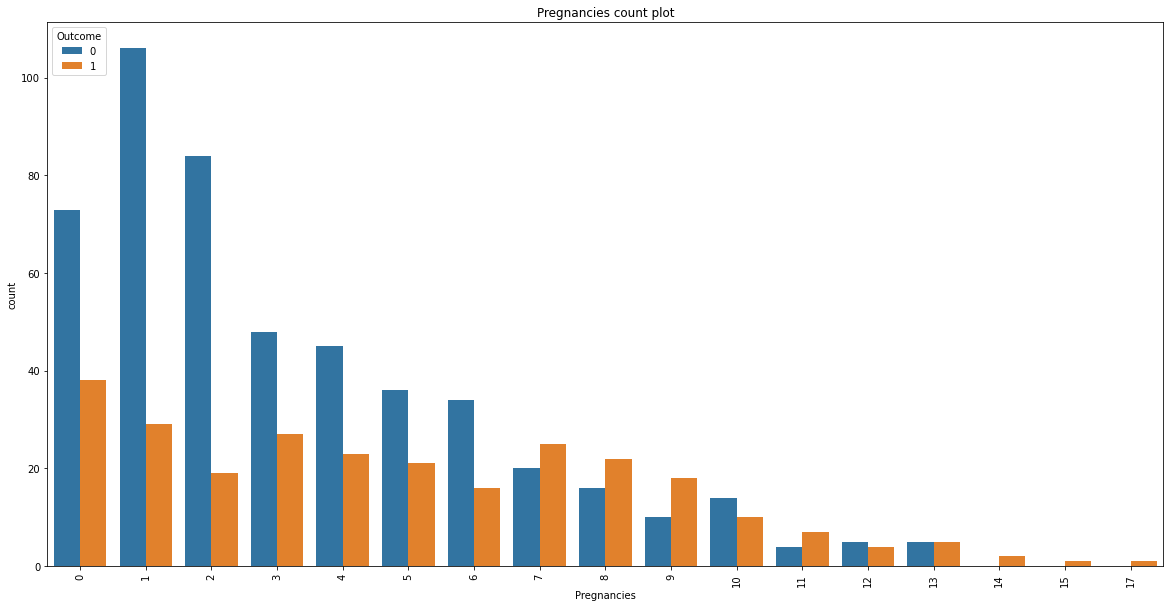

In [15]:
count_plot('Pregnancies')

## SCATTER PLOTS

Text(0.5, 1.0, 'scatter plot of BLOODPRESSURE and AGE DATA')

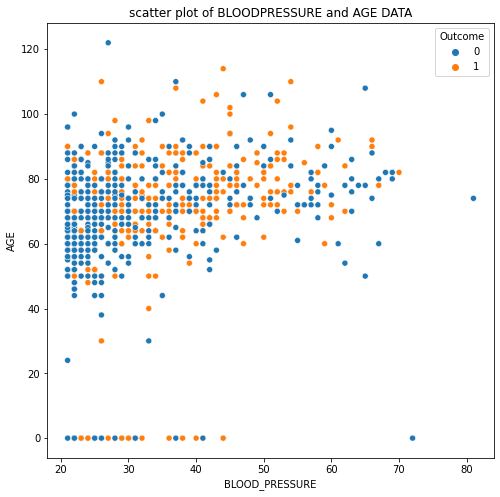

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='BloodPressure',data=data ,hue='Outcome')
plt.xlabel("BLOOD_PRESSURE")
plt.ylabel("AGE")
plt.title("scatter plot of BLOODPRESSURE and AGE DATA")

## CORRELATION PLOT { HEAT_PLOT}

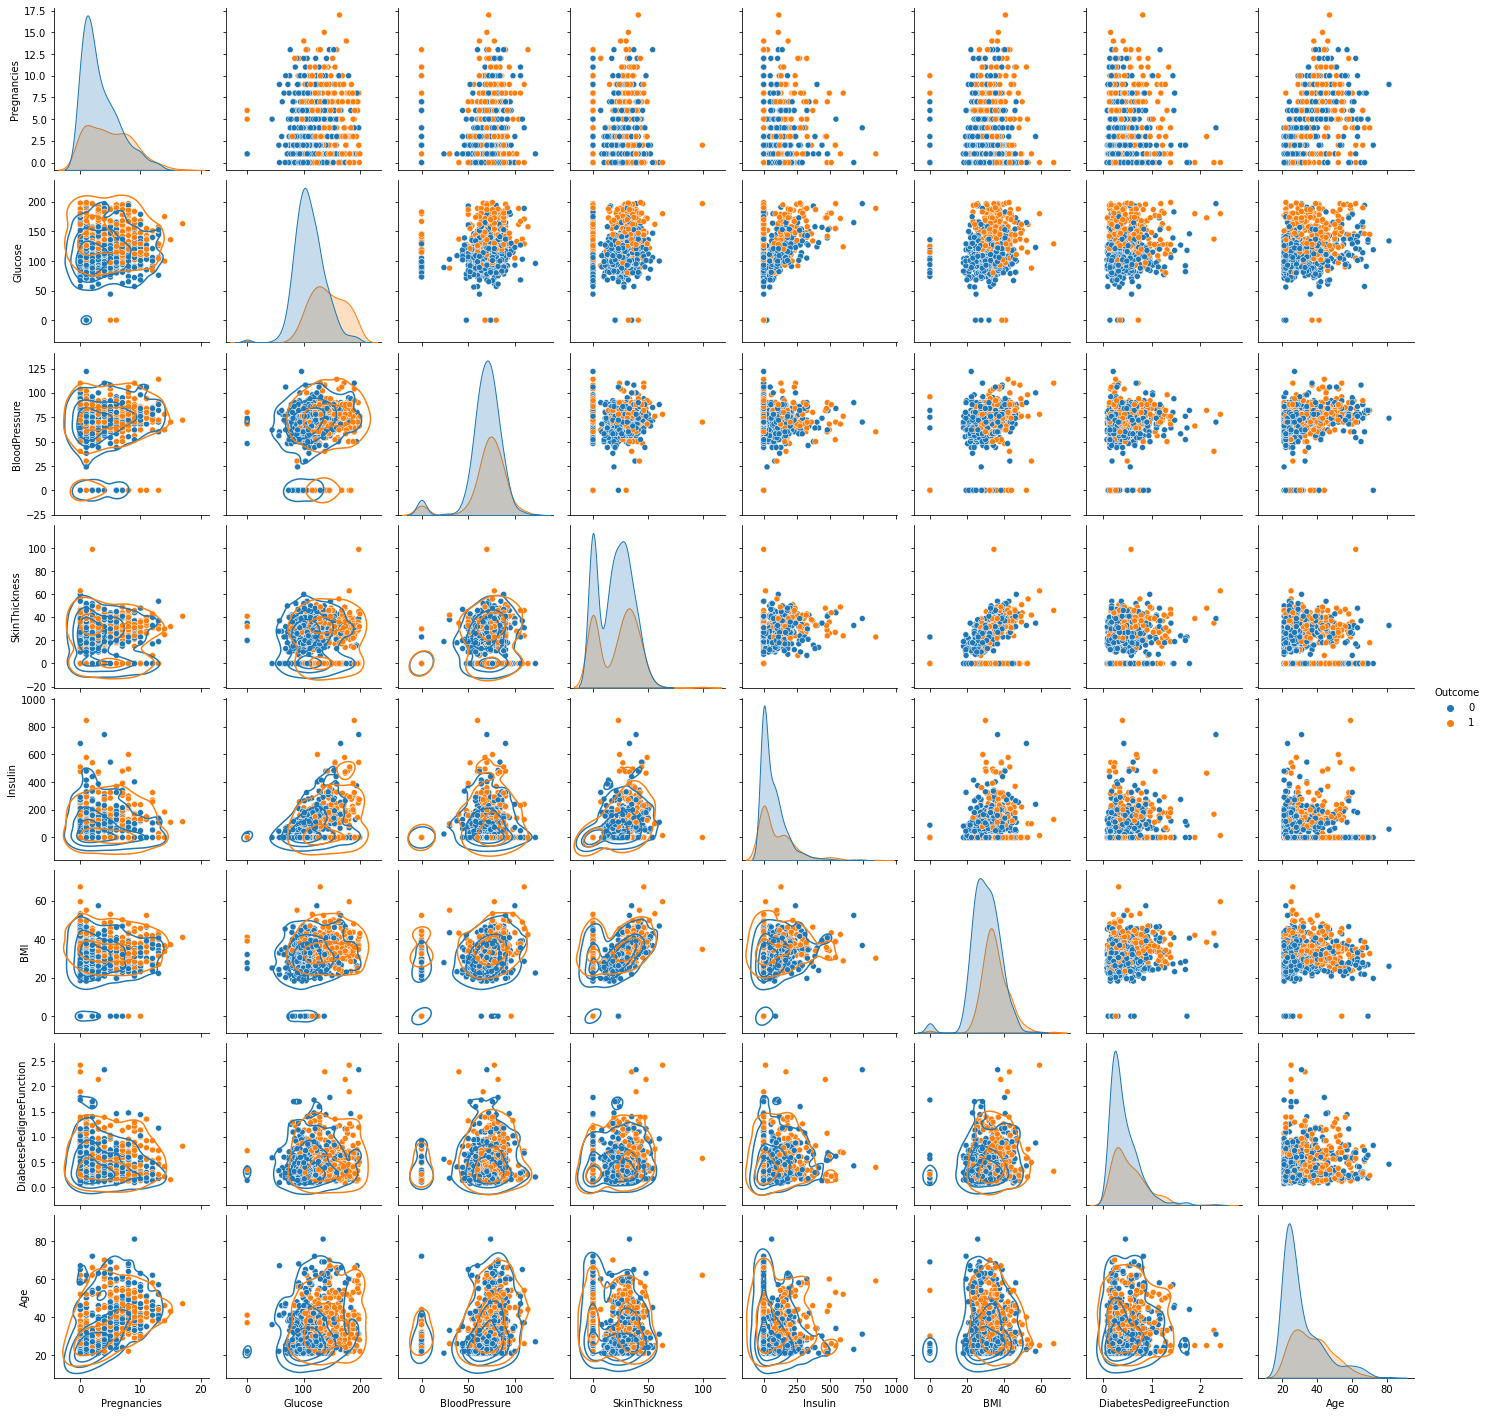

In [17]:
g = sns.pairplot(data, diag_kind="kde",hue='Outcome')
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## MODEL BUILDING

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

In [20]:
X= data.drop(columns='Outcome')
Y= data['Outcome']

## SPLITING THE DATA

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.30, random_state = 101)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((537, 8), (231, 8), (537,), (231,))

## STANDARDLIZATION OF MODEL

In [23]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

## X_TRAIN VALUES

In [25]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7
0,0.366001,0.164587,0.450369,0.402881,-0.511712,-0.328299,-0.119866,0.558327
1,-1.134325,0.794099,0.664536,-1.264652,-0.700954,1.057561,4.145905,0.892297
2,0.366001,-0.370497,-0.406299,1.267527,0.408697,0.459988,0.118534,-0.694061
3,0.065936,-0.339022,-0.192132,-1.264652,-0.700954,-0.035870,-0.018149,-0.360091
4,2.166393,0.196063,1.949538,-1.264652,-0.700954,0.866846,-0.911354,1.476745
...,...,...,...,...,...,...,...,...
532,-0.834260,-3.801334,-1.155884,-0.029443,-0.700954,-0.951300,-1.070287,-0.944538
533,-0.834260,-0.370497,-1.691302,-0.152964,0.331279,-1.154729,-0.221583,-0.610568
534,-0.834260,-0.055742,-1.370051,1.638090,-0.159032,0.421845,-0.625274,-0.694061
535,0.366001,-0.181644,0.343285,-1.264652,-0.700954,-0.124870,-0.425018,0.892297


## X_TEST

In [27]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7
0,-0.870288,0.148860,-0.384406,-1.347399,-0.674372,-0.183940,-0.304700,1.242163
1,-0.289258,2.033490,0.097144,0.086328,1.103228,0.614174,-0.143672,0.261020
2,0.872803,-0.469051,1.156554,-0.174349,-0.674372,-1.121407,-0.615838,1.331358
3,-1.160803,0.426921,0.000834,1.389717,1.547628,1.361614,-0.261031,-0.809317
4,0.001258,-1.148753,1.060244,0.151498,-0.176644,1.006897,-0.823264,-0.720122
...,...,...,...,...,...,...,...,...
226,1.163319,-0.376364,0.386074,1.194208,0.338860,-0.462646,0.489523,-0.184954
227,-0.579773,2.342446,0.097144,1.585225,4.151813,-0.133266,-0.825993,1.777332
228,-0.579773,1.106623,0.289764,0.933531,3.236348,0.994229,-0.891496,-0.274148
229,-1.160803,-0.499946,0.000834,0.086328,-0.674372,-1.463456,-0.613109,-0.987707


## IMPLIMANTING LOGISTIC REGRESSION

In [30]:
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression()

## ACCURACY SCORE 80% 

In [38]:
Y_pred = Lr.predict(X_test)
print("Accuracy of Logistic Regression Model is {:.2f}".format(Lr.score(X_test,Y_test)))
print("  ")
print(Y_pred)

Accuracy of Logistic Regression Model is 0.79
  
[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 1]


## CONFUSION MATRIX

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test,Y_pred)

print(confusion_matrix)

[[133  17]
 [ 31  50]]


## NO. OF INCORRECT VALUES

In [46]:
incor_pred= (Y_test!=Y_pred).sum()
print(incor_pred)

48


## CLASSIFICATION REPORT

In [44]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



## ROC CURVE

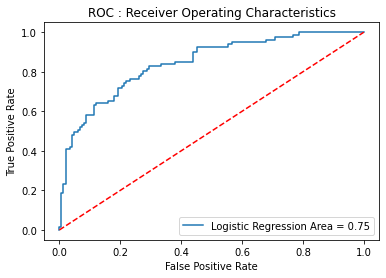

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(Y_test,Lr.predict(X_test))
fpr, tpr, thr = roc_curve(Y_test, Lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

# THE END !